### _Imports_

In [190]:
import pandas as pd
import numpy as np

from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

pd.set_option('display.max_columns', None)

In [191]:
df = pd.read_csv('../data/Superstore_250218.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Days,List Price,Net Price,COGS,Gross Margin,Product_encoded,Product PK,Order Year,Order Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,130.98,130.98,110.02,0.16,386,FUR-BO-10001798-00386,2016,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,243.98,243.98,170.79,0.30,839,FUR-CH-10000454-00839,2016,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,7.31,7.31,3.87,0.47,1433,OFF-LA-10000240-01433,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,348.21,191.52,268.12,0.23,366,FUR-TA-10000577-00366,2015,10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,13.98,11.18,9.93,0.29,573,OFF-ST-10000760-00573,2015,10


In [16]:
#df.info()

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Days,List Price,Net Price,COGS,Gross Margin,Product_encoded,Order Year,Order Month
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,3.958175,75.571127,60.918954,53.119865,0.341016,922.324795,2015.722233,7.809686
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,1.747567,188.961461,142.927479,122.251161,0.135602,531.515975,1.123555,3.284654
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000,0.990000,0.340000,0.540000,0.000000,0.000000,2014.000000,1.000000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,3.000000,6.480000,5.470000,3.470000,0.260000,474.250000,2015.000000,5.000000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,4.000000,19.980000,16.270000,12.930000,0.340000,907.000000,2016.000000,9.000000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,5.000000,76.980000,63.940000,54.520000,0.470000,1390.000000,2017.000000,11.000000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,7.000000,7546.160000,3773.080000,4074.930000,0.500000,1849.000000,2017.000000,12.000000


### Profit analysis

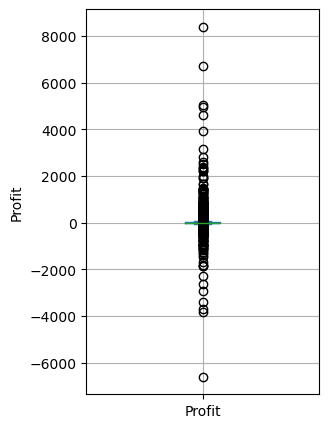

In [33]:
# Boxplot

data = df['Profit']

ax = data.plot.box(figsize=(3, 5))
ax.set_ylabel('Profit')
plt.grid()

In [37]:
# Range

rng = df['Profit'].max() - df['Profit'].min()
print(f'Profit Range is: {rng}')

Profit Range is: 14999.954000000002


In [98]:
# Distribution

per_05 = df['Profit'].quantile(0.05)
per_95 = df['Profit'].quantile(0.95)

print(f'90% of Profit distribution is between {int(per_05)} and {int(per_95)} dollars')

90% of Profit distribution is between -53 and 168 dollars


Text(0.5, 0, 'Profit')

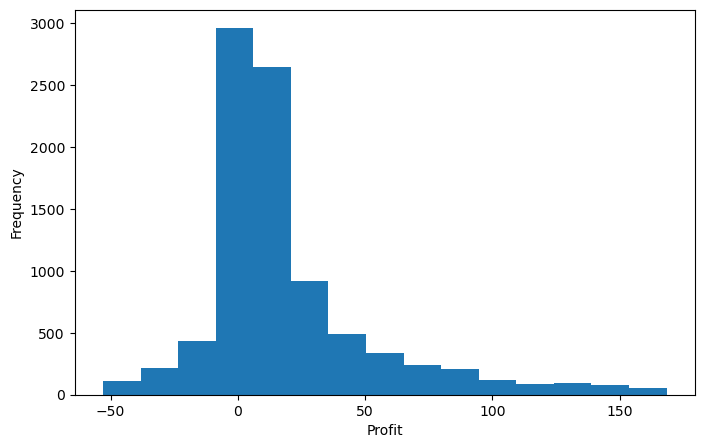

In [99]:
# Histogram

data = df['Profit']
ax = data.plot.hist(bins=15, range=(per_05, per_95), figsize=(8, 5))
ax.set_xlabel('Profit')

**INSIGHT**: profit has high variability. The mean is 28,66 dollars, but the range is 15.000 dollars. 80% of Profit is distributed between -53 and 168 dollars.

We need to understand the reasons of negative profit and how this can be improved. Let's see how this evolved year to year.

In [122]:
# Creating two sub-sets

profit_neg = df[df['Profit'] < 0 ]
profit_pos = df[df['Profit'] >= 0 ]

# Grouping by year

profit_neg = profit_neg.groupby('Order Year').agg(
    profit_neg_sum=('Profit', 'sum'),
    quantity_neg_sum=('Quantity', 'sum'))
    
profit_pos = profit_pos.groupby('Order Year').agg(
    profit_pos_sum=('Profit', 'sum'),
    quantity_pos_sum=('Quantity', 'sum'))


# Calculating the share of pieces sold with negative profit

result = pd.merge(profit_neg, profit_pos, on='Order Year')
result['neg_profit_share'] = (result['quantity_neg_sum'] / (result['quantity_neg_sum'] + result['quantity_pos_sum'])) * 100

result

,profit_neg_sum,quantity_neg_sum,profit_pos_sum,quantity_pos_sum,neg_profit_share
Order Year,,,,,
2014,-31892.7717,1409,81436.7458,6172,18.585939
2015,-32529.3909,1539,94147.9946,6440,19.288131
2016,-37872.9297,1801,119668.1040,8036,18.308427
2017,-53836.1934,2291,147275.4630,10185,18.363257


Conclusion: it seems that the share of pieces sold with negative profit is nearly stable: 18%.

### Profit vs Numerical Variables

In [123]:
num_vars = list(df.describe().columns)
cat_vars = [col for col in df.columns if col not in num_vars]

In [125]:
df_num_vars = df[num_vars]

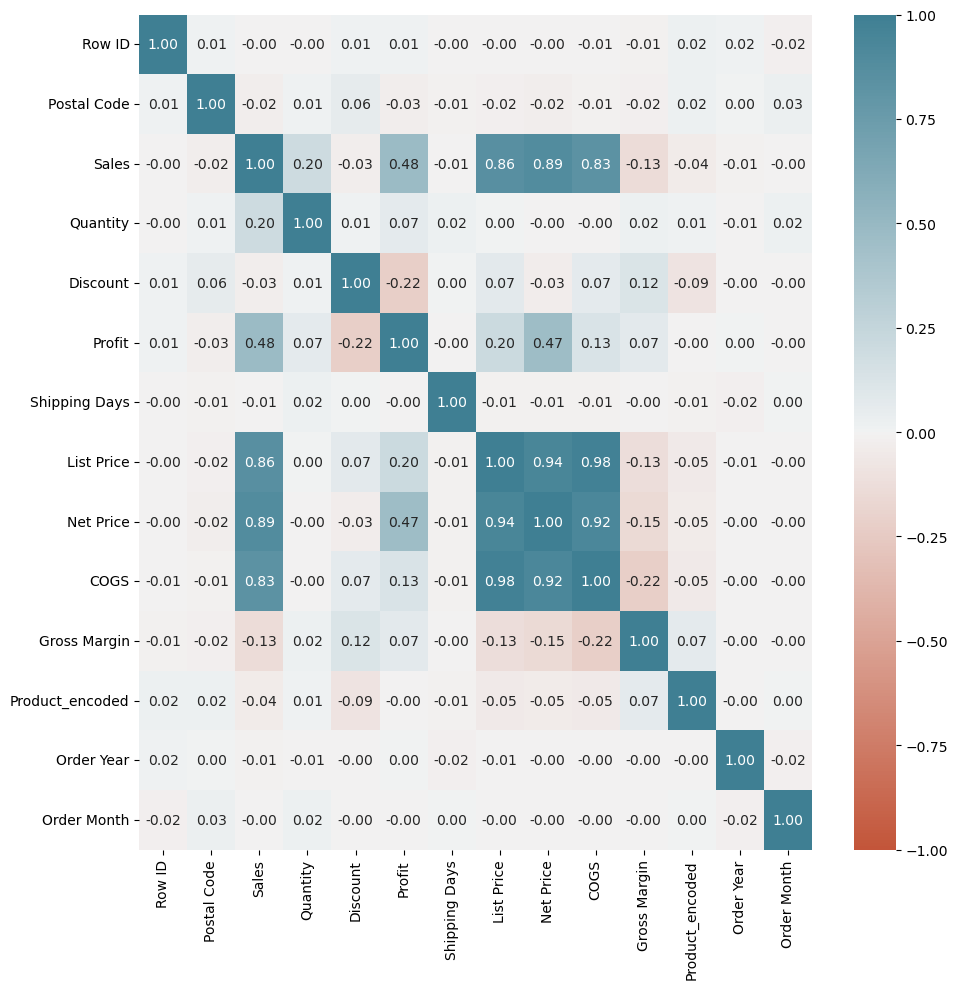

In [127]:
# Correlation Matix:

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df_num_vars.corr(),
                 vmin=-1,
                 vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 annot=True,
                 fmt=".2f",
                 ax=ax)
plt.tight_layout()

**INSIGHTS**:
- The variables that are most related to Profit are List Price, Net Price and Sales (positive impact), and Discounts (negative impact)
- Surprisingly the Quantity has low correlation with Profit. This might be explained by the fact that Quantity and Price have no correlation. Translating this into business logic, it means that no matter how expensive the product is, the customer will always buy the same number of pieces. This usually applies to need-driven purchases.
- The Quantity is neither explained by the discounts, meaning that discounts are not boosting sales. By contrary, discounts decrease the profit. This is meaningful for discount strategy of the supermarket

C:\Users\Kristina\AppData\Local\Temp\ipykernel_10196\1010233530.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, y='Profit', x='Sales', palette='viridis', size='Discount',


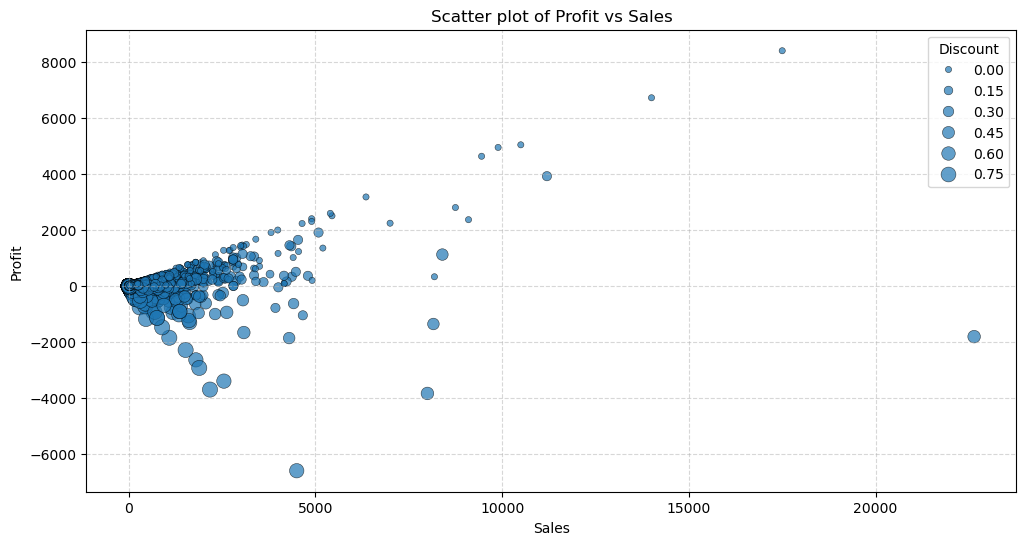

In [142]:
# Scatter plot - Profit vs Sales:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, y='Profit', x='Sales', palette='viridis', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7)

plt.title('Scatter plot of Profit vs Sales')
plt.xlabel('Sales')
plt.ylabel('Profit')

plt.grid(True, linestyle='--', alpha=0.5) 

Conclusion: this confirms what we have seen in correlation matrix. Profit is positively related to Sales, but most sales with high discount have negative profit.

C:\Users\Kristina\AppData\Local\Temp\ipykernel_10196\3849271103.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, y='Profit', x='Discount', palette='viridis', size='Sales',


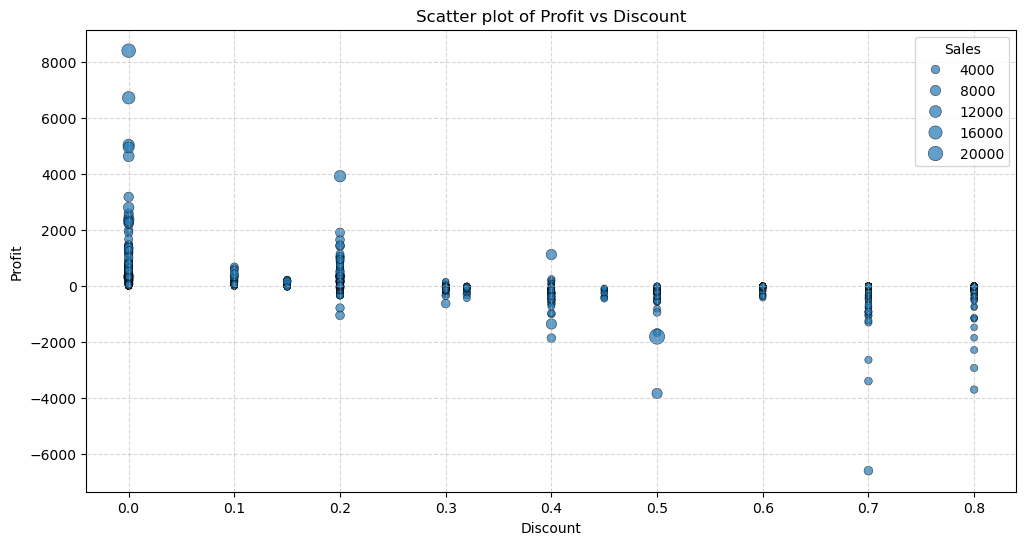

In [143]:
# Scatter plot - Profit vs Discount:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, y='Profit', x='Discount', palette='viridis', size='Sales',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7)

plt.title('Scatter plot of Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')

plt.grid(True, linestyle='--', alpha=0.5) 

**INSIGHTS**: Above 40% of discount the profit is always negative. So, unless the discount is motivated by the need of stock cleaning, the company should consider giving a maximum discount of 40% or less.

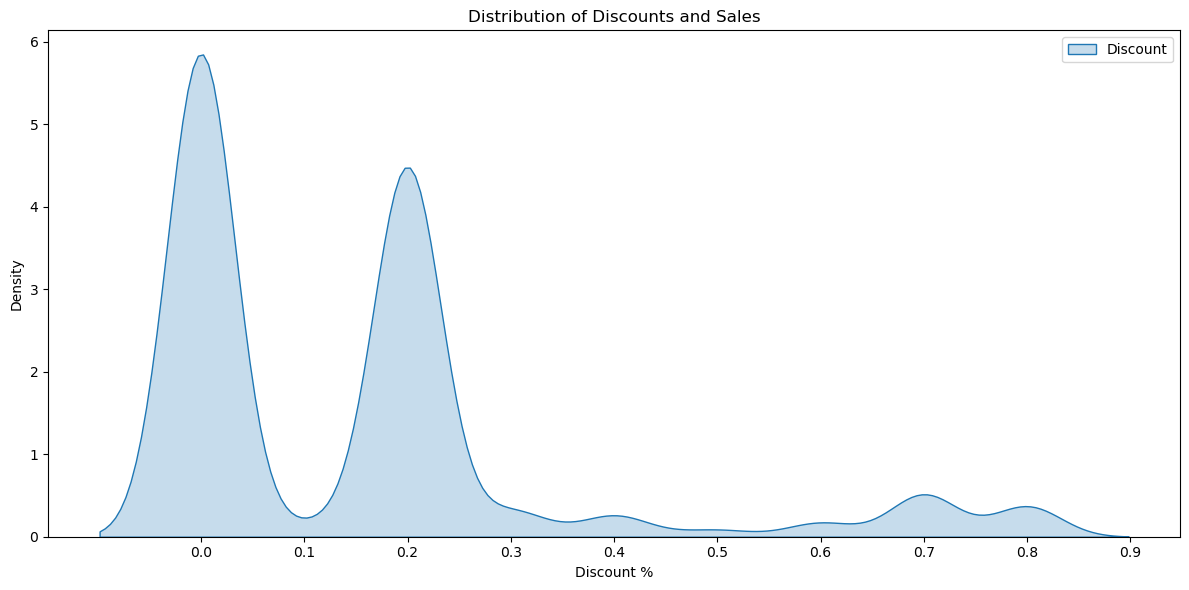

In [144]:
# Plot KDE for Discount

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Discount', label='Discount', fill=True)

plt.title('Distribution of Discounts and Sales')
plt.xlabel('Discount %')
plt.xticks(np.arange(0, 1, step=0.1))
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

Conclusion: this ilustrates more precisely that most of the sales are generated with discounts of 0% and 20%.

In [159]:
# Evolution over time:

profit_year = df.groupby('Order Year').agg(
    profit=('Profit', 'sum'),
    list_price=('List Price', 'mean'),
    discount=('Discount', 'mean'),
    sales=('Sales', 'sum'),
    quantity=('Quantity', 'sum'),
    num_products=('Product PK', 'count'),
    num_branches=('Postal Code', 'count'),
    cogs=('COGS', 'mean'),
)

profit_year['gross_margin'] = profit_year['profit'] / profit_year['sales']

profit_year

,profit,list_price,discount,sales,quantity,num_products,num_branches,cogs,gross_margin
Order Year,,,,,,,,,
2014,49543.9741,79.093618,0.158284,484247.4981,7581,1993,1993,55.335931,0.102311
2015,61618.6037,72.932892,0.155609,470532.5090,7979,2102,2102,51.177355,0.130955
2016,81795.1743,76.066104,0.154743,609205.5980,9837,2587,2587,53.803409,0.134265
2017,93439.2696,74.739224,0.156467,733215.2552,12476,3312,3312,52.485266,0.127438


**Insights**:
- Profit increased year over year
- Average discount is stable (15%)
- Sales increased in the last two years, but not in 2015. That might be because of lower List Price that year compared to the previous.
- Gross Margin increased in 2015 and 2016, but decreased in 2017

### Profit vs Categorical Variables

In [183]:
# Customer Segment

df_segment = df.groupby('Segment').agg(
    profit_sum=('Profit', 'sum'),
    profit_mean=('Profit', 'mean'),
    discount_mean=('Discount', 'mean'),
    sales_sum=('Sales', 'sum'),
    quantity_sum=('Quantity', 'sum'),
).reset_index()

df_segment['profit_sum'] = df_segment['profit_sum']/1000
df_segment['sales_sum'] = df_segment['sales_sum']/1000
df_segment['quantity_sum'] = df_segment['quantity_sum']/1000
df_segment['gross_margin'] = df_segment['profit_sum'] / df_segment['sales_sum']
    
df_segment

,Segment,profit_sum,profit_mean,discount_mean,sales_sum,quantity_sum,gross_margin
0,Consumer,134.119209,25.836873,0.158141,1161.401345,19.521,0.115481
1,Corporate,91.979134,30.456667,0.158228,706.146367,11.608,0.130255
2,Home Office,60.298679,33.818664,0.147128,429.653148,6.744,0.140343


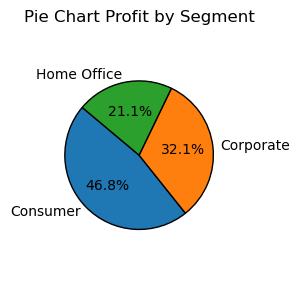

In [189]:
plt.figure(figsize=(3, 3))

plt.pie(df_segment['profit_sum'], labels=df_segment['Segment'], autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

plt.axis('equal')
plt.title('Pie Chart Profit by Segment')
plt.tight_layout()

**INSIGHTS:** Consumer segment delivers the biggest share of Profit, but it also has the lowest Gross Margin.

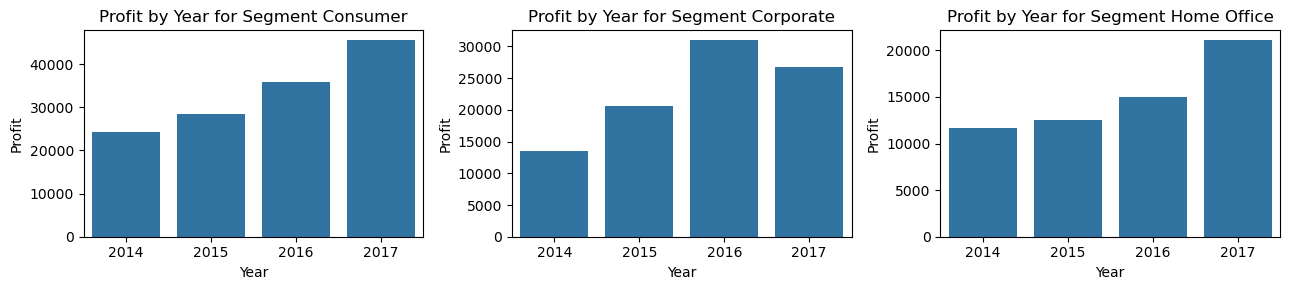

In [176]:
# Segment evolution by year:

eval_feature = 'Profit'

df_segment_year = df.groupby(['Segment', 'Order Year'])[eval_feature].sum().reset_index()

segments = df_segment_year['Segment'].unique()

# Create subplots (one for each segment)
fig, axes = plt.subplots(nrows=1, ncols=len(segments), figsize=(13, 3))

# Loop through each segment and plot its respective bar chart
for ax, segment in zip(axes, segments):

    segment_data = df_segment_year[df_segment_year['Segment'] == segment]
    
    sns.barplot(data=segment_data, x='Order Year', y=eval_feature, ax=ax)
    
    ax.set_title(f'{eval_feature} by Year for Segment {segment}')
    ax.set_xlabel('Year')
    ax.set_ylabel(eval_feature)

plt.tight_layout()

Conclusion: Profit increased in all segments year over year, except for Corporate, where total profit decreased in 2017.

**To does:** see why?

In [192]:
# Product Category

df_category = df.groupby('Category').agg(
    profit_sum=('Profit', 'sum'),
    profit_mean=('Profit', 'mean'),
    discount_mean=('Discount', 'mean'),
    sales_sum=('Sales', 'sum'),
    quantity_sum=('Quantity', 'sum'),
).reset_index()

df_category['profit_sum'] = df_category['profit_sum']/1000
df_category['sales_sum'] = df_category['sales_sum']/1000
df_category['quantity_sum'] = df_category['quantity_sum']/1000
df_category['gross_margin'] = df_category['profit_sum'] / df_category['sales_sum']
    
df_category

,Category,profit_sum,profit_mean,discount_mean,sales_sum,quantity_sum,gross_margin
0,Furniture,18.451273,8.699327,0.173923,741.999795,8.028,0.024867
1,Office Supplies,122.490801,20.327050,0.157285,719.047032,22.906,0.170352
2,Technology,145.454948,78.752002,0.132323,836.154033,6.939,0.173957


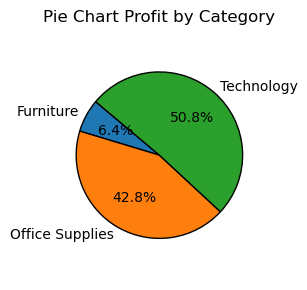

In [194]:
plt.figure(figsize=(3, 3))

plt.pie(df_category['profit_sum'], labels=df_category['Category'], autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

plt.axis('equal')
plt.title('Pie Chart Profit by Category')
plt.tight_layout()

**INSIGHTS:**
- The most profitable product category is Technology, represents half of the total Profit
- Furniture has very low Gross Margin (only 2%). This is something to improve

**To does:** analyse why GM for Furniture is so low

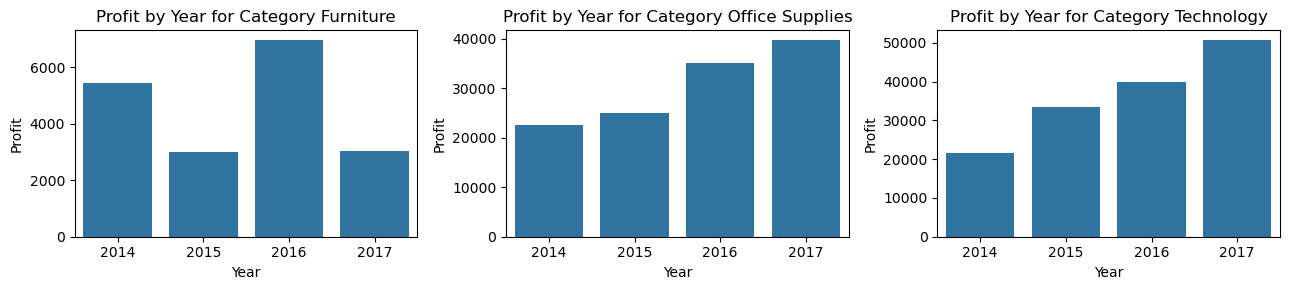

In [205]:
# Segment evolution by year:

eval_feature = 'Profit'

df_category_year = df.groupby(['Category', 'Order Year'])[eval_feature].sum().reset_index()

categories = df_category_year['Category'].unique()

# Create subplots (one for each segment)
fig, axes = plt.subplots(nrows=1, ncols=len(categories), figsize=(13, 3))

# Loop through each segment and plot its respective bar chart
for ax, category in zip(axes, categories):

    category_data = df_category_year[df_category_year['Category'] == category]
    
    sns.barplot(data=category_data, x='Order Year', y=eval_feature, ax=ax)
    
    ax.set_title(f'{eval_feature} by Year for Category {category}')
    ax.set_xlabel('Year')
    ax.set_ylabel(eval_feature)

plt.tight_layout()

Conclusion: Office Suppliers and Technology grew year over year, but Furniture decreased significantly in 2015 and 2017. We need to analyse what was different in those years to identify the reason of profit loss.